## 1. 데이터 불러오기


In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas as pd
import pandas_profiling

data = pd.read_csv('/content/drive/MyDrive/태풍/typhoon_data.csv', encoding='cp949')
data.profile_report()

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/태풍/typhoon_data.csv', encoding = 'cp949')

In [ ]:
data

,Unnamed: 0,일시,위도(N),경도(E),중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,진행방향,이동속도(km/h),70% 확률 반경(km),name,현재
0,0,2011년 09월 07일 12시,21.5,135.4,1000.0,18.0,65.0,100.0,약,소형,북북동,15.0,0.0,typhoon1,0.0
1,1,2011년 09월 07일 12시,23.5,135.0,996.0,19.0,68.0,150.0,약,소형,북북서,10.0,150.0,typhoon1,24.0
2,2,2011년 09월 07일 12시,25.6,134.5,1002.0,-1.0,-4.0,0.0,-,-,북북서,10.0,0.0,typhoon1,48.0
3,3,2011년 09월 07일 15시,21.5,135.3,1000.0,18.0,65.0,120.0,약,소형,서,4.0,0.0,typhoon1,0.0
4,4,2011년 09월 07일 15시,23.6,134.9,996.0,19.0,68.0,180.0,약,소형,북,10.0,150.0,typhoon1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42452,22,2011년 09월 06일 09시,37.9,149.4,994.0,21.0,76.0,250.0,약,소형,북동,27.0,0.0,typhoon529,0.0
42453,23,2011년 09월 06일 09시,46.4,147.5,996.0,-1.0,-4.0,0.0,-,-,북북서,40.0,0.0,typhoon529,24.0
42454,24,2011년 09월 06일 15시,39.4,150.1,994.0,21.0,76.0,250.0,약,소형,북북동,30.0,0.0,typhoon529,0.0
42455,25,2011년 09월 06일 15시,48.5,147.9,996.0,-1.0,-4.0,0.0,-,-,북북서,43.0,0.0,typhoon529,24.0


In [ ]:
data.shape

(42457, 15)

In [ ]:
data.isnull().sum() / data.shape[0]

Unnamed: 0        0.000000
일시                0.000000
위도(N)             0.000000
경도(E)             0.000000
중심기압              0.040535
초속(m/s)           0.054432
시속(km/h)          0.054432
강풍반경(km)[예외반경]    0.067668
강도                0.054903
크기                0.067645
진행방향              0.054149
이동속도(km/h)        0.054008
70% 확률 반경(km)     0.104553
name              0.000000
현재                0.000000
dtype: float64

In [ ]:
data.shape[0]

42457

In [ ]:
time_list = []
date_list = []

for i in range(data.shape[0]):
  time_list.append(float(data['일시'][i].split(' ')[3][:2]))
  date_list.append(data['일시'][i].split(' ')[0][:4] + '-' + data['일시'][i].split(' ')[1][:2] + '-' + data['일시'][i].split(' ')[2][:2])

In [ ]:
data['time'] = time_list
data['date'] = date_list

In [ ]:
data

,Unnamed: 0,일시,위도(N),경도(E),중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,진행방향,이동속도(km/h),70% 확률 반경(km),name,현재,time,date
0,0,2011년 09월 07일 12시,21.5,135.4,1000.0,18.0,65.0,100.0,약,소형,북북동,15.0,0.0,typhoon1,0.0,12.0,2011-09-07
1,1,2011년 09월 07일 12시,23.5,135.0,996.0,19.0,68.0,150.0,약,소형,북북서,10.0,150.0,typhoon1,24.0,12.0,2011-09-07
2,2,2011년 09월 07일 12시,25.6,134.5,1002.0,-1.0,-4.0,0.0,-,-,북북서,10.0,0.0,typhoon1,48.0,12.0,2011-09-07
3,3,2011년 09월 07일 15시,21.5,135.3,1000.0,18.0,65.0,120.0,약,소형,서,4.0,0.0,typhoon1,0.0,15.0,2011-09-07
4,4,2011년 09월 07일 15시,23.6,134.9,996.0,19.0,68.0,180.0,약,소형,북,10.0,150.0,typhoon1,24.0,15.0,2011-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42452,22,2011년 09월 06일 09시,37.9,149.4,994.0,21.0,76.0,250.0,약,소형,북동,27.0,0.0,typhoon529,0.0,9.0,2011-09-06
42453,23,2011년 09월 06일 09시,46.4,147.5,996.0,-1.0,-4.0,0.0,-,-,북북서,40.0,0.0,typhoon529,24.0,9.0,2011-09-06
42454,24,2011년 09월 06일 15시,39.4,150.1,994.0,21.0,76.0,250.0,약,소형,북북동,30.0,0.0,typhoon529,0.0,15.0,2011-09-06
42455,25,2011년 09월 06일 15시,48.5,147.9,996.0,-1.0,-4.0,0.0,-,-,북북서,43.0,0.0,typhoon529,24.0,15.0,2011-09-06


In [ ]:
data_tr = data[data['현재']==0]
data_tr

,Unnamed: 0,일시,위도(N),경도(E),중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,진행방향,이동속도(km/h),70% 확률 반경(km),name,현재,time,date
0,0,2011년 09월 07일 12시,21.5,135.4,1000.0,18.0,65.0,100.0,약,소형,북북동,15.0,0.0,typhoon1,0.0,12.0,2011-09-07
3,3,2011년 09월 07일 15시,21.5,135.3,1000.0,18.0,65.0,120.0,약,소형,서,4.0,0.0,typhoon1,0.0,15.0,2011-09-07
6,6,2011년 09월 07일 21시,22.2,135.5,998.0,17.0,61.0,150.0,약,소형,북북동,14.0,0.0,typhoon1,0.0,21.0,2011-09-07
12,12,2011년 09월 08일 03시,23.7,135.2,998.0,18.0,65.0,150.0,약,소형,북북서,29.0,0.0,typhoon1,0.0,3.0,2011-09-08
18,18,2011년 09월 08일 09시,24.7,134.2,1000.0,18.0,65.0,150.0,약,소형,북서,26.0,0.0,typhoon1,0.0,9.0,2011-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42447,17,2011년 09월 05일 21시,36.5,148.7,994.0,21.0,76.0,250.0,약,소형,북서,33.0,0.0,typhoon529,0.0,21.0,2011-09-05
42450,20,2011년 09월 06일 03시,36.8,148.3,994.0,21.0,76.0,250.0,약,소형,북서,9.0,0.0,typhoon529,0.0,3.0,2011-09-06
42452,22,2011년 09월 06일 09시,37.9,149.4,994.0,21.0,76.0,250.0,약,소형,북동,27.0,0.0,typhoon529,0.0,9.0,2011-09-06
42454,24,2011년 09월 06일 15시,39.4,150.1,994.0,21.0,76.0,250.0,약,소형,북북동,30.0,0.0,typhoon529,0.0,15.0,2011-09-06


## 2. 데이터 전처리

### (1) 다중회귀분석, ANN을 위한 데이터 전처리

### (2) 시각화를 위한 데이터 전처리

In [ ]:
data2 = data_tr.drop(['Unnamed: 0', '위도(N)', '경도(E)', '진행방향', '현재', '일시'], axis = 1)
data2

,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date
0,1000.0,18.0,65.0,100.0,약,소형,15.0,0.0,typhoon1,12.0,2011-09-07
3,1000.0,18.0,65.0,120.0,약,소형,4.0,0.0,typhoon1,15.0,2011-09-07
6,998.0,17.0,61.0,150.0,약,소형,14.0,0.0,typhoon1,21.0,2011-09-07
12,998.0,18.0,65.0,150.0,약,소형,29.0,0.0,typhoon1,3.0,2011-09-08
18,1000.0,18.0,65.0,150.0,약,소형,26.0,0.0,typhoon1,9.0,2011-09-08
...,...,...,...,...,...,...,...,...,...,...,...
42447,994.0,21.0,76.0,250.0,약,소형,33.0,0.0,typhoon529,21.0,2011-09-05
42450,994.0,21.0,76.0,250.0,약,소형,9.0,0.0,typhoon529,3.0,2011-09-06
42452,994.0,21.0,76.0,250.0,약,소형,27.0,0.0,typhoon529,9.0,2011-09-06
42454,994.0,21.0,76.0,250.0,약,소형,30.0,0.0,typhoon529,15.0,2011-09-06


In [ ]:
data2.head()

,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date
0,1000.0,18.0,65.0,100.0,약,소형,15.0,0.0,typhoon1,12.0,2011-09-07
3,1000.0,18.0,65.0,120.0,약,소형,4.0,0.0,typhoon1,15.0,2011-09-07
6,998.0,17.0,61.0,150.0,약,소형,14.0,0.0,typhoon1,21.0,2011-09-07
12,998.0,18.0,65.0,150.0,약,소형,29.0,0.0,typhoon1,3.0,2011-09-08
18,1000.0,18.0,65.0,150.0,약,소형,26.0,0.0,typhoon1,9.0,2011-09-08


In [ ]:
data2.isnull().sum() / data2.shape[0]

중심기압              0.000000
초속(m/s)           0.017057
시속(km/h)          0.017057
강풍반경(km)[예외반경]    0.018858
강도                0.018116
크기                0.018752
이동속도(km/h)        0.003072
70% 확률 반경(km)     0.470283
name              0.000000
time              0.000000
date              0.000000
dtype: float64

In [ ]:
data2.shape[0]

9439

In [ ]:
import numpy as np

In [ ]:
data2['강도'].replace({'-' : 0, np.nan : 0, '약' : 0, '중' : 1, '강' : 2, '매우강' : 3, '매우 강' : 3, '초강력' : 4}, inplace = True)
data2['크기'].replace({'-' : 0, np.nan : 0, '소형' : 0, '중형' : 1, '대형' : 2, '초대형' : 2}, inplace = True)

In [ ]:
data2

,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date
0,1000.0,18.0,65.0,100.0,0,0,15.0,0.0,typhoon1,12.0,2011-09-07
3,1000.0,18.0,65.0,120.0,0,0,4.0,0.0,typhoon1,15.0,2011-09-07
6,998.0,17.0,61.0,150.0,0,0,14.0,0.0,typhoon1,21.0,2011-09-07
12,998.0,18.0,65.0,150.0,0,0,29.0,0.0,typhoon1,3.0,2011-09-08
18,1000.0,18.0,65.0,150.0,0,0,26.0,0.0,typhoon1,9.0,2011-09-08
...,...,...,...,...,...,...,...,...,...,...,...
42447,994.0,21.0,76.0,250.0,0,0,33.0,0.0,typhoon529,21.0,2011-09-05
42450,994.0,21.0,76.0,250.0,0,0,9.0,0.0,typhoon529,3.0,2011-09-06
42452,994.0,21.0,76.0,250.0,0,0,27.0,0.0,typhoon529,9.0,2011-09-06
42454,994.0,21.0,76.0,250.0,0,0,30.0,0.0,typhoon529,15.0,2011-09-06


In [ ]:
data2.isnull().sum() / data2.shape[0]

중심기압              0.000000
초속(m/s)           0.017057
시속(km/h)          0.017057
강풍반경(km)[예외반경]    0.018858
강도                0.000000
크기                0.000000
이동속도(km/h)        0.003072
70% 확률 반경(km)     0.470283
name              0.000000
time              0.000000
date              0.000000
dtype: float64

In [ ]:
data2['index_'] = range(len(data2))
data2.set_index('index_')

,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date
index_,,,,,,,,,,,
0,1000.0,18.0,65.0,100.0,0,0,15.0,0.0,typhoon1,12.0,2011-09-07
1,1000.0,18.0,65.0,120.0,0,0,4.0,0.0,typhoon1,15.0,2011-09-07
2,998.0,17.0,61.0,150.0,0,0,14.0,0.0,typhoon1,21.0,2011-09-07
3,998.0,18.0,65.0,150.0,0,0,29.0,0.0,typhoon1,3.0,2011-09-08
4,1000.0,18.0,65.0,150.0,0,0,26.0,0.0,typhoon1,9.0,2011-09-08
...,...,...,...,...,...,...,...,...,...,...,...
9434,994.0,21.0,76.0,250.0,0,0,33.0,0.0,typhoon529,21.0,2011-09-05
9435,994.0,21.0,76.0,250.0,0,0,9.0,0.0,typhoon529,3.0,2011-09-06
9436,994.0,21.0,76.0,250.0,0,0,27.0,0.0,typhoon529,9.0,2011-09-06


In [ ]:
typhoon_list = list(set(data['name']))
typhoon_list = sorted(typhoon_list, key = lambda x: int(x[7:]))
time_list2 = []

for i in typhoon_list:
  sum = 0
  for j in range(len(data2)):
    if j+1 > 9438:
      break
    if i == data2.iloc[j][8]:
      time_list2.append(sum)
      if data2.iloc[j+1][9] <= data2.iloc[j][9]:
        sum += (24 + data2.iloc[j+1][9]) - data2.iloc[j][9]
        continue
      sum += data2.iloc[j+1][9] - data2.iloc[j][9]

In [ ]:
time_list2.append(54)
print(len(time_list2))

9439


In [ ]:
data2['time2'] = time_list2

In [ ]:
data2.isnull().sum() / data2.shape[0]

중심기압              0.000000
초속(m/s)           0.017057
시속(km/h)          0.017057
강풍반경(km)[예외반경]    0.018858
강도                0.000000
크기                0.000000
이동속도(km/h)        0.003072
70% 확률 반경(km)     0.470283
name              0.000000
time              0.000000
date              0.000000
index_            0.000000
time2             0.000000
dtype: float64

In [ ]:
data2 = data2.fillna(0)

## 3. 다중회귀분석 모델링

In [ ]:
data2.to_csv('/content/drive/MyDrive/태풍/data2.csv')

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/태풍/data2.csv')

In [ ]:
new_data

,Unnamed: 0,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date,index_,time2
0,0,1000.0,18.0,65.0,100.0,0,0,15.0,0.0,typhoon1,12.0,2011-09-07,0,0.0
1,3,1000.0,18.0,65.0,120.0,0,0,4.0,0.0,typhoon1,15.0,2011-09-07,1,3.0
2,6,998.0,17.0,61.0,150.0,0,0,14.0,0.0,typhoon1,21.0,2011-09-07,2,9.0
3,12,998.0,18.0,65.0,150.0,0,0,29.0,0.0,typhoon1,3.0,2011-09-08,3,15.0
4,18,1000.0,18.0,65.0,150.0,0,0,26.0,0.0,typhoon1,9.0,2011-09-08,4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,42447,994.0,21.0,76.0,250.0,0,0,33.0,0.0,typhoon529,21.0,2011-09-05,9434,30.0
9435,42450,994.0,21.0,76.0,250.0,0,0,9.0,0.0,typhoon529,3.0,2011-09-06,9435,36.0
9436,42452,994.0,21.0,76.0,250.0,0,0,27.0,0.0,typhoon529,9.0,2011-09-06,9436,42.0
9437,42454,994.0,21.0,76.0,250.0,0,0,30.0,0.0,typhoon529,15.0,2011-09-06,9437,48.0


In [ ]:
new_data = new_data.drop(['Unnamed: 0', 'index_'], axis = 1)

In [ ]:
new_data.columns

Index(['중심기압', '초속(m/s)', '시속(km/h)', '강풍반경(km)[예외반경]', '강도', '크기',
       '이동속도(km/h)', '70% 확률 반경(km)', 'name', 'time', 'date', 'time2'],
      dtype='object')

In [ ]:
new_data.rename(columns = {'초속(m/s)' : '초속', '시속(km/h)' : '시속', '강풍반경(km)[예외반경]' : '강풍반경', '이동속도(km/h)' : '이동속도', '70% 확률 반경(km)' : '확률반경', 'time2' : '시간'}, inplace = True  )

회귀계수 + 결정계수( $R^{2}$ ) 확인

In [ ]:
new_data.columns

Index(['중심기압', '초속', '시속', '강풍반경', '강도', '크기', '이동속도', '확률반경', 'name', 'time',
       'date', '시간'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x = new_data[['중심기압', '시속', '크기', '이동속도', '확률반경', '시간']]
y = new_data[['강도']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
new_data.isnull().sum() / new_data.shape[0]

중심기압    0.0
초속      0.0
시속      0.0
강풍반경    0.0
강도      0.0
크기      0.0
이동속도    0.0
확률반경    0.0
name    0.0
time    0.0
date    0.0
시간      0.0
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
y_predict = mlr.predict(x_test)

In [ ]:
print(y_predict)

[[0.17777404]
 [1.84040741]
 [0.16838744]
 ...
 [1.3489198 ]
 [2.39514003]
 [0.89180657]]


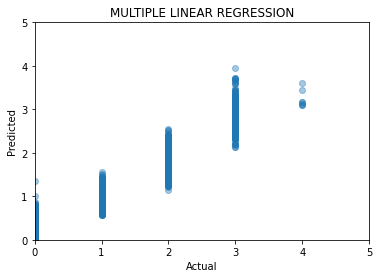

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.axis([0, 5, 0, 5])
plt.show()

In [ ]:
print(mlr.coef_)

[[-0.00981094  0.01679612  0.15316958  0.00124003  0.00155164  0.00115913]]


In [ ]:
((y_test - y_predict) ** 2).sum()

강도    289.091902
dtype: float64

In [ ]:
((y_test - y.mean()) ** 2).sum()

강도    2328.953569
dtype: float64

In [ ]:
print(mlr.score(x_train, y_train))

0.8726557553022004


다중 공분산성 확인 (VIF 확인)


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
new_data.columns

Index(['중심기압', '초속', '시속', '강풍반경', '강도', '크기', '이동속도', '확률반경', 'name', 'time',
       'date', '시간'],
      dtype='object')

In [ ]:
dfx = new_data[['중심기압', '시속', '크기', '이동속도', '확률반경', '시간']]
dfy = new_data[['강도']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
dfx.values

array([[1000.,   65.,    0.,   15.,    0.,    0.],
       [1000.,   65.,    0.,    4.,    0.,    3.],
       [ 998.,   61.,    0.,   14.,    0.,    9.],
       ...,
       [ 994.,   76.,    0.,   27.,    0.,   42.],
       [ 994.,   76.,    0.,   30.,    0.,   48.],
       [ 994.,   -4.,    0.,   34.,    0.,   54.]])

In [ ]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
vif['features'] = dfx.columns
vif = vif.sort_values('VIF Factor').reset_index(drop = True)
vif

,VIF Factor,features
0,1.000220,확률반경
1,2.682423,크기
2,2.793661,시간
3,3.887283,이동속도
4,10.354821,시속
5,10.513634,중심기압


분석표

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols(formula = '강도 ~ 확률반경 + 크기 + 시간 + 이동속도 + 시속 + 중심기압', data = new_data)

In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 1.088e+04
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:09:11   Log-Likelihood:                -4492.2
No. Observations:                9439   AIC:                             8998.
Df Residuals:                    9432   BIC:                             9049.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3508      0.309     33.506      0.000       9.745      10.956
확률반경           0.0016      0.008      0.210      0.834      -0.014       0.017
크기             0.1518      0.009     17.311      0.000       0.135       0.169
시간             0.0011   6.22e-05     17.538      0.000       0.001       0.001
이동속도           0.0009      0.000      2.862      0.004       0.000       0.002
시속             0.0160      0.000     90.034      0.000       0.016       0.016
중심기압          -0.0114      0.000    -38.068      0.000      -0.012      -0.011
==============================================================================
Omnibus:                     5338.851   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1156749.668
Skew:                          -1.595   Prob(JB):                         0.00
Kurtosis:                      57.139   Cond. No.                     7.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
new_data.columns

In [ ]:
new_data.rename(columns = {'초속(m/s)' : '초속', '시속(km/h)' : '시속', '이동속도(km/h)' : '이동속도', '70% 확률 반경(km)' : '확률반경'}, inplace = True  )

In [ ]:
new_data

In [ ]:
new_data.rename(columns = {'반경 ' : '반경'}, inplace = True)